<a href="https://colab.research.google.com/github/Karthikavijayan525/Mini-Project--Image-Classification/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1- Gather Data
!pip install bing-image-downloader

In [ ]:
!ls

drive  sample_data


In [ ]:
cd /content/drive/My Drive/Mini project- Image classification

/content/drive/My Drive/Mini project- Image classification


In [ ]:
!ls

Project.ipynb


In [ ]:
!mkdir images

In [ ]:
cd images

/content/drive/My Drive/Mini project- Image classification/images


In [ ]:
from bing_image_downloader import downloader
downloader.download("cat animal",limit=5,output_dir='images')



[!!]Indexing page: 1

[%] Indexed 5 Images on Page 1.


[%] Downloading Image #1 from http://2.bp.blogspot.com/-WtdFq_e6eKo/TV5W5s-hS-I/AAAAAAAAAvM/gmCUYOx3bX8/s1600/Animals_Cats_Small_cat_005241_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-MzZCzWI_6Xc/UIUQp1qPfzI/AAAAAAAAHpA/OTwHCJSWFAY/s1600/cats_animals_kittens_cat_kitten_cute_desktop_1680x1050_hd-wallpaper-753974.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/mammals/d/domestic-cat_thumb.ngsversion.1472140774957.adapt.1900.1.jpg
[!] Issue getting: http://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/mammals/d/domestic-cat_thumb.ngsversion.1472140774957.adapt.1900.1.jpg
[!] Error:: timed out
[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg/1200px-An_up-close_picture_of_a_curious

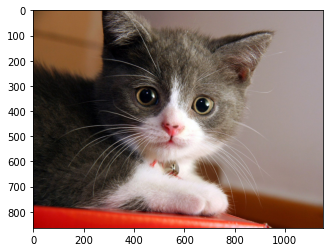

In [ ]:
path='/content/drive/My Drive/Mini project- Image classification/images/images/cat animal/Image_1.jpg'
import cv2
import matplotlib.pyplot as plt

i=cv2.imread(path)
i=cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)

In [ ]:
from bing_image_downloader import downloader
downloader.download("dog animal",limit =5,output_dir ='images')



[!!]Indexing page: 1

[%] Indexed 5 Images on Page 1.


[%] Downloading Image #1 from https://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/mammals/d/domestic-dog_thumb.ngsversion.1484159404151.adapt.1900.1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-yMVd9pY0Nuw/UcfewWCnEJI/AAAAAAAAAlk/zeUeT-aRJ3o/s1600/Dog.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Collage_of_Nine_Dogs.jpg/1200px-Collage_of_Nine_Dogs.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://r.ddmcdn.com/s_f/o_1/w_682/h_1024/APL/uploads/2014/12/pets-dogs.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/JhLGw0bLHSs/maxresdefault.jpg
[%] File Downloaded !



In [ ]:
#Creating DataFrame using library os
#reading an image
#Step-Preprocessing of Data
import os
import cv2
path = '/content/drive/My Drive/Mini project- Image classification/images/images/cat animal'
for filename in os.listdir(path):
  i=cv2.imread(os.path.join(path,filename))
  print(i.shape)

(864, 1152, 3)
(1000, 1600, 3)
(768, 1024, 3)
(864, 1152, 3)
(1000, 1600, 3)


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
target = [] #this is the list of Target Output
flat_data = [] #image pixel in flatten style
images= []

path= '/content/drive/My Drive/Mini project- Image classification/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:  
    category=dirpath.split('/')[-1]
    target.append(category)
    img=imread(f'{path}{category}/{filename}')
    img_resized=resize(img,(50,50))#scaling down
    flat_data.append(img_resized.flatten())#flattening
    images.append(img_resized)

flat_data = np.array(flat_data)
target=np.array(target)
images=np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(10, 7500)
(10,)
(10, 50, 50, 3)


In [ ]:
import numpy as np

a=np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
a.flatten()

array([1, 2, 3, 4])

In [ ]:
#trial 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [ ]:
df.shape

(10, 7501)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.455518,0.301961,0.160784,0.506634,0.333569,0.184314,0.553333,0.361176,0.200886,0.580941,0.380941,0.215686,0.596078,0.396078,0.223529,0.600000,0.396078,0.223529,0.600000,0.395529,0.220157,0.603922,0.396078,0.223529,0.603922,0.396078,0.227451,0.603922,0.409333,0.252471,0.603922,0.440863,0.309804,0.498667,0.363216,0.263355,0.174510,0.125490,0.102510,0.264863,...,0.951843,0.567843,0.506510,0.909412,0.497098,0.429882,0.822431,0.414907,0.347922,0.572941,0.270380,0.218850,0.320676,0.103294,0.032157,0.306431,0.078980,0.000000,0.336378,0.090602,0.000000,0.357412,0.105882,0.003922,0.372549,0.113725,0.003922,0.376471,0.113725,0.003922,0.376471,0.117647,0.003922,0.376471,0.117647,0.003922,0.376471,0.117647,0.003922,cat animal
1,0.852941,0.847059,0.862745,0.858824,0.850980,0.862745,0.858824,0.850980,0.858824,0.853922,0.847059,0.854902,0.847059,0.839216,0.847059,0.847059,0.839216,0.847059,0.847059,0.839216,0.847059,0.841176,0.831373,0.835294,0.847059,0.837255,0.844118,0.854902,0.847059,0.854902,0.866667,0.858824,0.858824,0.875490,0.866667,0.862745,0.874510,0.866667,0.862745,0.864706,...,0.980392,0.980392,0.988235,0.980392,0.980392,0.988235,0.976471,0.976471,0.984314,0.972549,0.972549,0.984314,0.968627,0.967647,0.980392,0.964706,0.960784,0.976471,0.964706,0.960784,0.976471,0.960784,0.956863,0.972549,0.956863,0.952941,0.968627,0.952941,0.949020,0.968627,0.949020,0.948039,0.964706,0.945098,0.941176,0.960784,0.941176,0.937255,0.952941,cat animal
2,0.066483,0.084549,0.019608,0.073647,0.105725,0.015686,0.062745,0.074510,0.007843,0.074510,0.089617,0.008422,0.078431,0.109564,0.011765,0.070588,0.113725,0.007843,0.074510,0.114431,0.011765,0.058502,0.090510,0.007843,0.024235,0.033429,0.003922,0.023529,0.007843,0.003922,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.013373,0.003922,0.000000,0.030602,...,0.352941,0.192157,0.117647,0.345098,0.200000,0.124784,0.349020,0.197558,0.121569,0.363807,0.235059,0.152706,0.403922,0.333333,0.239216,0.411765,0.267059,0.179757,0.392157,0.231373,0.149020,0.418452,0.241981,0.149020,0.431373,0.247059,0.156863,0.447059,0.243137,0.156863,0.431373,0.260000,0.168133,0.397492,0.257178,0.165569,0.440235,0.195242,0.105882,cat animal
3,0.455518,0.301961,0.160784,0.506634,0.333569,0.184314,0.553333,0.361176,0.200886,0.580941,0.380941,0.215686,0.596078,0.396078,0.223529,0.600000,0.396078,0.223529,0.600000,0.395529,0.220157,0.603922,0.396078,0.223529,0.603922,0.396078,0.227451,0.603922,0.409333,0.252471,0.603922,0.440863,0.309804,0.498667,0.363216,0.263355,0.174510,0.125490,0.102510,0.264863,...,0.951843,0.567843,0.506510,0.909412,0.497098,0.429882,0.822431,0.414907,0.347922,0.572941,0.270380,0.218850,0.320676,0.103294,0.032157,0.306431,0.078980,0.000000,0.336378,0.090602,0.000000,0.357412,0.105882,0.003922,0.372549,0.113725,0.003922,0.376471,0.113725,0.003922,0.376471,0.117647,0.003922,0.376471,0.117647,0.003922,0.376471,0.117647,0.003922,cat animal
4,0.852941,0.847059,0.862745,0.858824,0.850980,0.862745,0.858824,0.850980,0.858824,0.853922,0.847059,0.854902,0.847059,0.839216,0.847059,0.847059,0.839216,0.847059,0.847059,0.839216,0.847059,0.841176,0.831373,0.835294,0.847059,0.837255,0.844118,0.854902,0.847059,0.854902,0.866667,0.858824,0.858824,0.875490,0.866667,0.862745,0.874510,0.866667,0.862745,0.864706,...,0.980392,0.980392,0.988235,0.980392,0.980392,0.988235,0.976471,0.976471,0.984314,0.972549,0.972549,0.984314,0.968627,0.967647,0.980392,0.964706,0.960784,0.976471,0.964706,0.960784,0.976471,0.960784,0.956863,0.972549,0.956863,0.952941,0.968627,0.952941,0.949020,0.968627,0.949020,0.948039,0.964706,0.945098,0.941176,0.960784,0.941176,0.937255,0.952941,cat animal


In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
#training the algorithm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#making predictions
y_pred = svclassifier.predict(X_test)

In [ ]:
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2]]
              precision    recall  f1-score   support

  cat animal       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



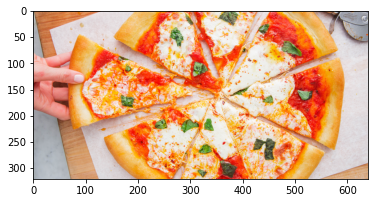

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
i = imread('https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-homemade-pizza-horizontal-1542312378.png?crop=1.00xw:0.752xh;0,0.139xh&resize=640:*')

plt.imshow(i)

